Tradução: Gabriel S. Ferrante

# **Thresholding, Binarization e Thresholding adaptativo**

#### **O que iremos aprender:**
1. Imagens binarizadas
2. Métodos de Thresholding
3. Thresholding Adaptativo
4. SkImage's Threshold Local

In [7]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

### **Métodos de Thresholding (limiarização)** 

![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Screenshot%202020-11-17%20at%2012.57.55%20am.png)
![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Screenshot%202020-11-17%20at%2012.58.09%20am.png)

https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

Thresholding é um processo de conversão de uma imagem em escala de cinza para uma imagem binária, onde os pixels são representados por apenas dois valores: 0 ou 255.

Um exemplo simples de thresholding envolve a seleção de um valor de pixel, denominado p, e a definição de todos os pixels com intensidades inferiores a p como zero (preto) e todos os pixels com intensidades superiores a p como 255 (branco). Essa abordagem nos permite criar uma representação binária da imagem, destacando as áreas de interesse com base no valor de threshold escolhido.

O thresholding é uma técnica comumente usada para segmentar objetos ou áreas específicas de uma imagem, facilitando a sua análise e extração de informações relevantes. A escolha adequada do valor de threshold é essencial para obter resultados precisos e satisfatórios, e isso muitas vezes requer experimentação e ajuste de acordo com a natureza da imagem e do problema em questão.

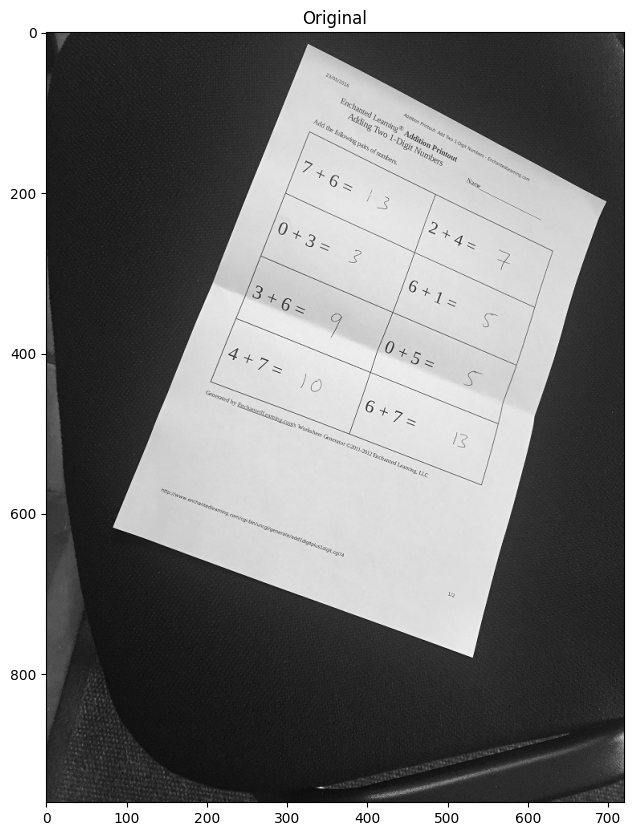

127.0


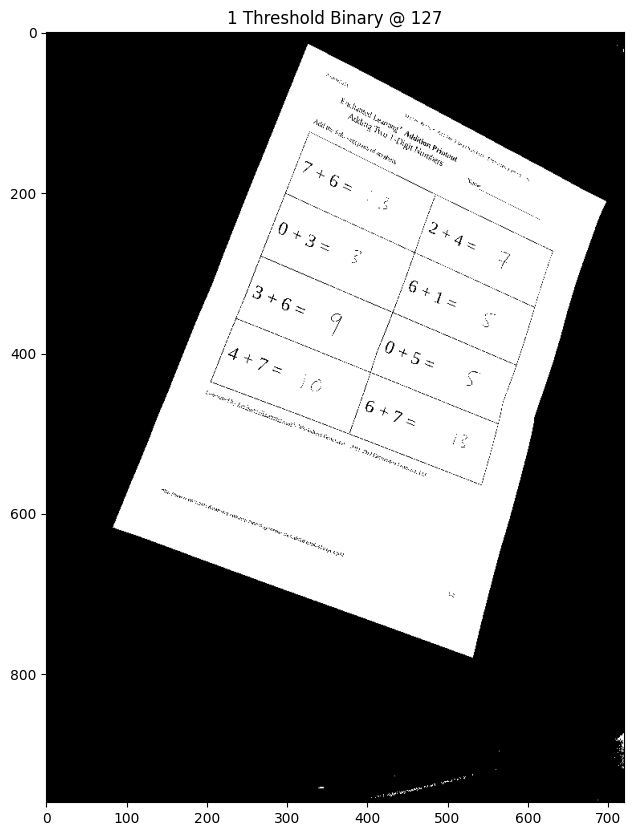

127.0


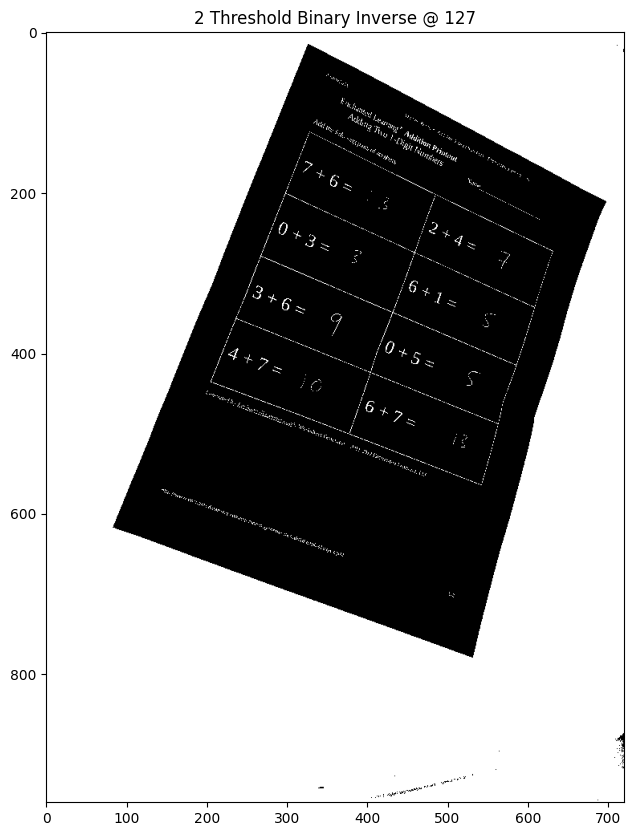

127.0


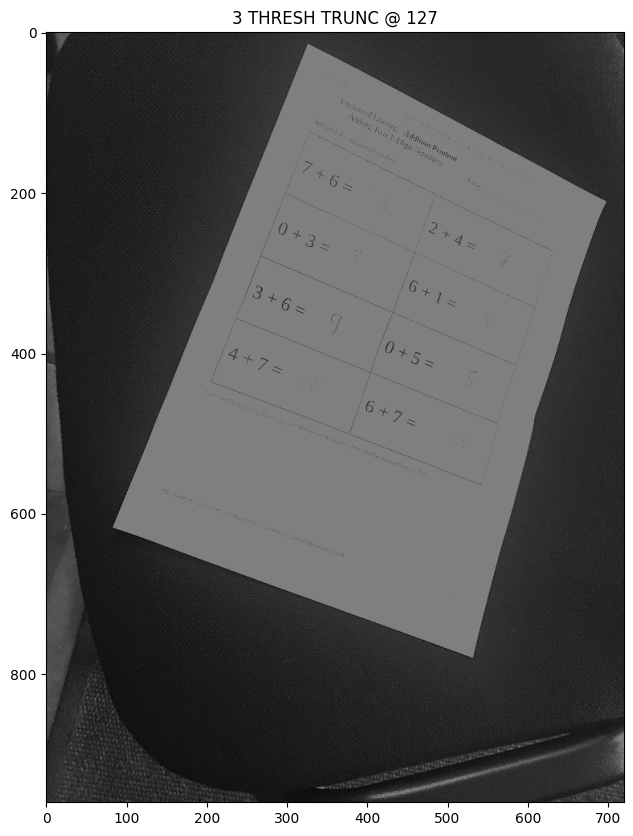

127.0


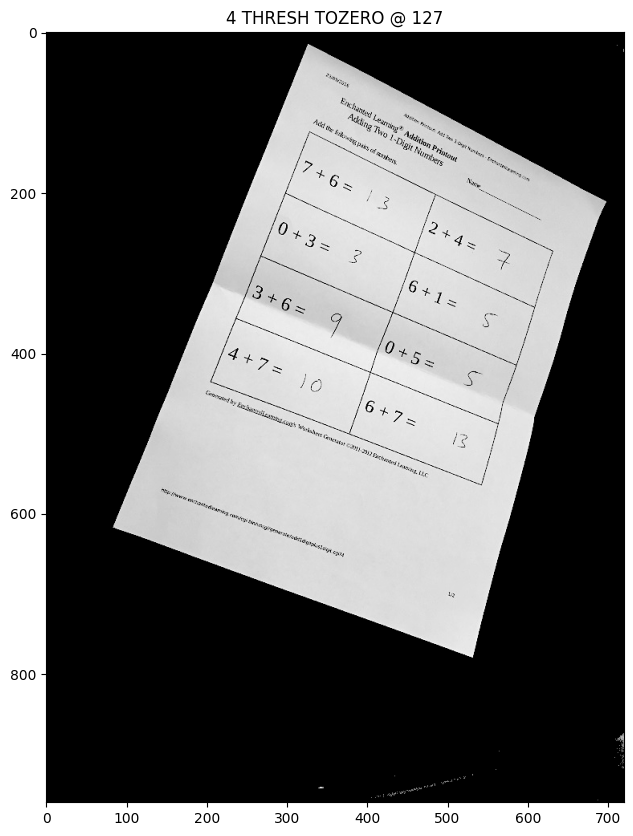

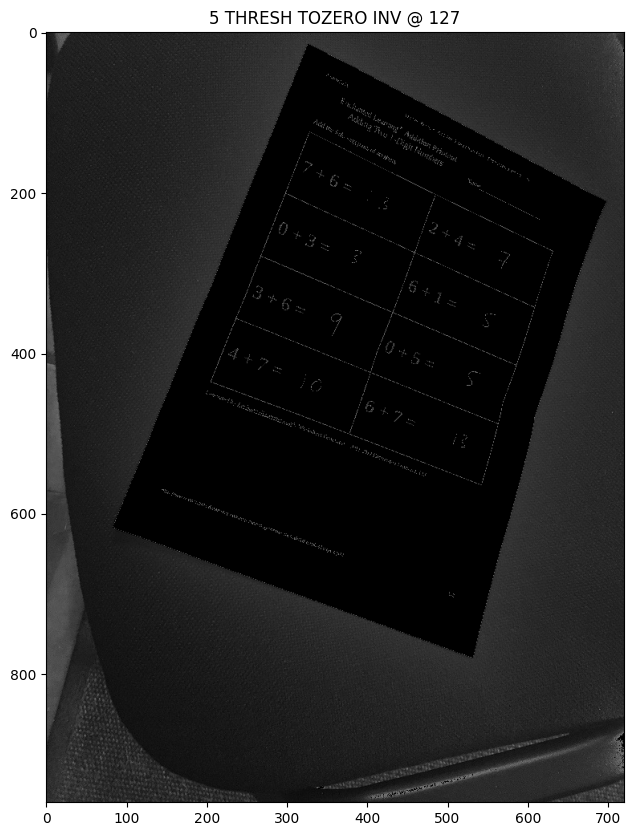

In [8]:
# lendo a imagem e já transformando em grayscale
image = cv2.imread('./images/scan.jpg',0)
imshow("Original", image)

# Valores abaixo de 127 vão para 0 (preto), tudo acima vai para 255 (branco)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
print(ret)
imshow('1 Threshold Binary @ 127', thresh1)

# Valores abaixo 127 vão para o branco 255 e os valores acima de 127 vão para o preto (inverso do de cima)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
print(ret)
imshow('2 Threshold Binary Inverse @ 127', thresh2)

# valores acima de 127 são truncados (mantido) em 127 (o argumento de 255 não é usado)
ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
print(ret)
imshow('3 THRESH TRUNC @ 127', thresh3)

# Valores abaixo 127 vão 0 (preto), acima 127 não são alterados 
ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
print(ret)
imshow('4 THRESH TOZERO @ 127', thresh4)

# Ao contrário da anterior
ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
imshow('5 THRESH TOZERO INV @ 127', thresh5)

#### **Thresholding Adaptativo**


O thresholding adaptativo é uma técnica de binarização de imagens em que o limite de thresholding é calculado localmente, em vez de ser um valor global para toda a imagem. Essa abordagem permite lidar melhor com variações de iluminação e sombras, que podem fazer com que técnicas de thresholding global falhem em áreas com diferentes níveis de brilho.

Por Que Usar o Thresholding Adaptativo?
Quando uma imagem possui iluminação não uniforme (por exemplo, sombras ou gradientes de luz), o uso de um único valor de threshold global não consegue separar corretamente os objetos do fundo. Em tais casos, o thresholding adaptativo calcula o valor do threshold individualmente para pequenas regiões da imagem, adaptando-se melhor às condições locais de iluminação.

Como o Thresholding Adaptativo Funciona
Em vez de um único valor, o thresholding adaptativo calcula o limiar com base em pequenas janelas ou blocos ao redor de cada pixel. Existem duas principais abordagens para calcular esse valor:

- Mean Adaptive Thresholding: Calcula a média dos pixels na vizinhança e a usa como valor de threshold.
- Algoritmo adaptativo de Otsu: O algoritmo de Otsu é uma técnica de thresholding global que encontra automaticamente o valor ótimo de threshold para separar objetos e fundo em uma imagem em tons de cinza. Ele é útil quando queremos binarizar uma imagem sem ter que escolher manualmente um valor de threshold, especialmente em casos onde a imagem possui um histograma bimodal (dois picos), indicando a presença de duas classes distintas, como fundo e objeto.


1. ADAPTIVE_THRESH_MEAN_C
Ele calcula o valor do threshold para cada pixel com base na média dos valores de intensidade dos pixels na vizinhança (ou bloco) ao redor dele. Esse método é útil para imagens com iluminação irregular, onde um valor de threshold global pode não funcionar bem.


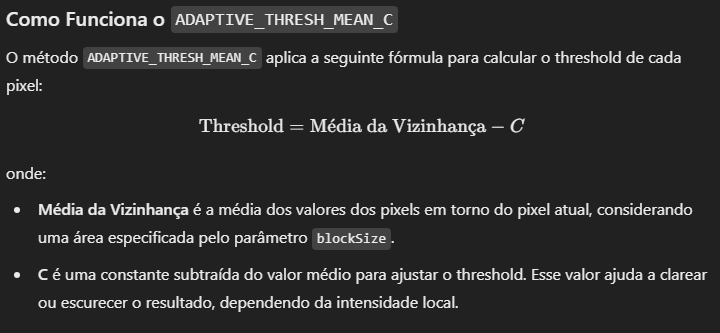



#### **cv2.adaptiveThreshold Parameters**

``**cv2.adaptiveThreshold**(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) → dst``

- **src** – Imagem de 8 bits.
- **dst** – Imagem de destino do mesmo tamanho e tipo que src.
- **maxValue** – Valor diferente de zero atribuído aos pixels para os quais a condição é satisfeita. Veja os detalhes abaixo..
- **adaptiveMethod** – Algoritmo de limite adaptativo a ser usado, ADAPTIVE_THRESH_MEAN_C ou ADAPTIVE_THRESH_GAUSSIAN_C . See the details below.
- **thresholdType** – Tipo de limite que deve ser THRESH_BINARY ou THRESH_BINARY_INV .
- **blockSize** – Tamanho de uma vizinhança de pixel usada para calcular um valor limite para o pixel: 3, 5, 7 e assim por diante.
- **C** – Constante subtraída da média ou média ponderada. Normalmente, é positivo, mas também pode ser zero ou negativo.


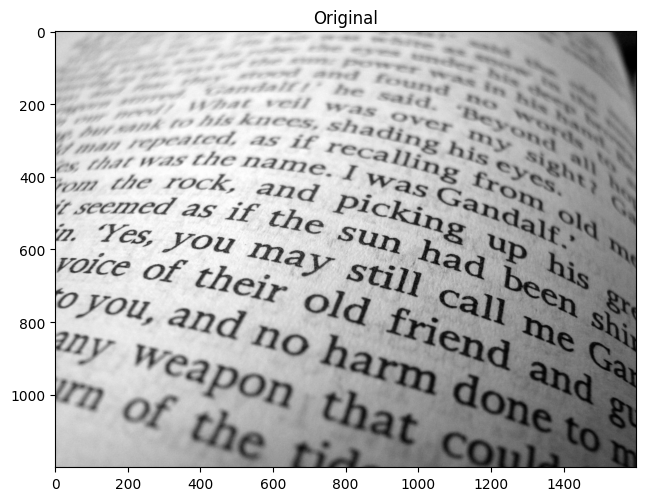

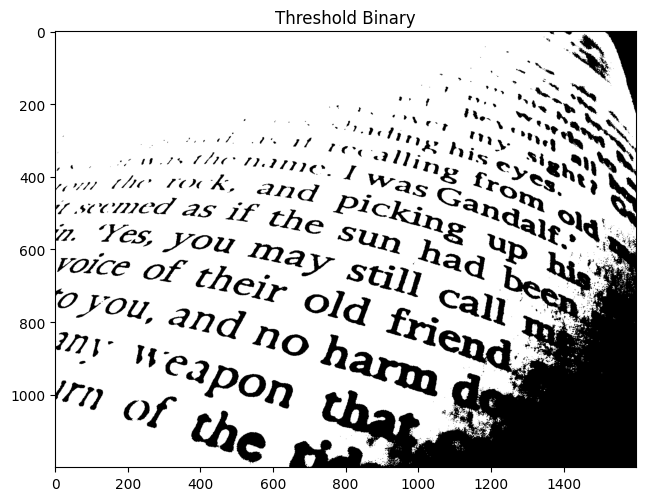

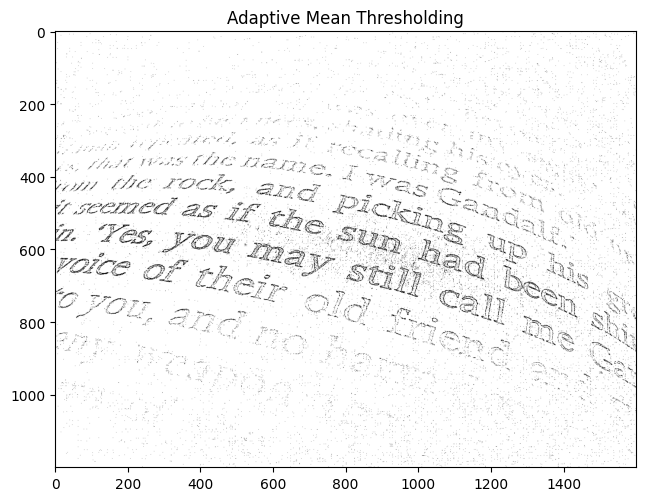

In [21]:
image = cv2.imread('./images/fotoDeLivro.jpg',0)
imshow("Original", image)

# Binarização simples.
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow('Threshold Binary', thresh1)

# É uma boa prática desfocar as imagens, pois isso remove o ruído
#image = cv2.GaussianBlur(image, (3, 3), 0)

# usando adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
imshow("Adaptive Mean Thresholding", thresh) 


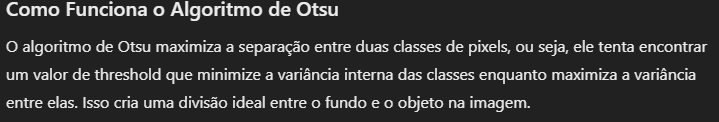

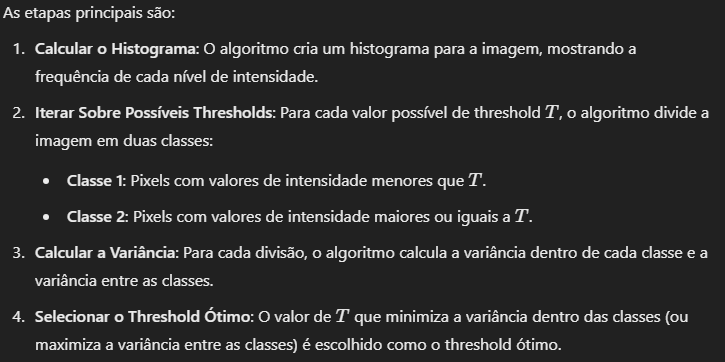

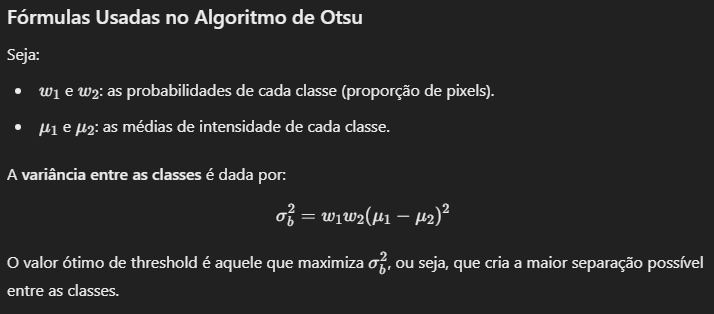

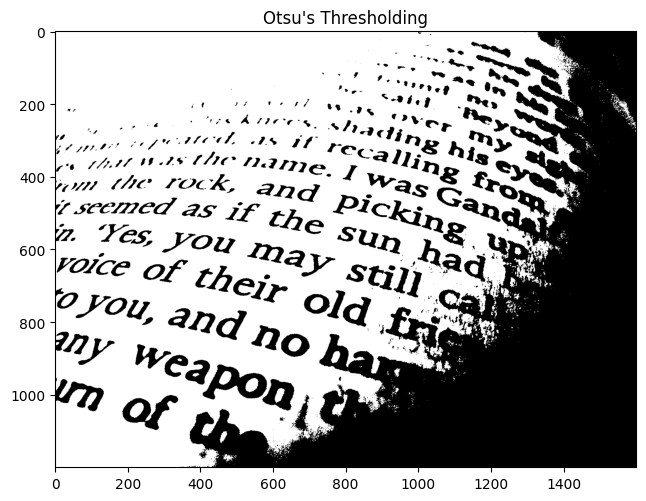

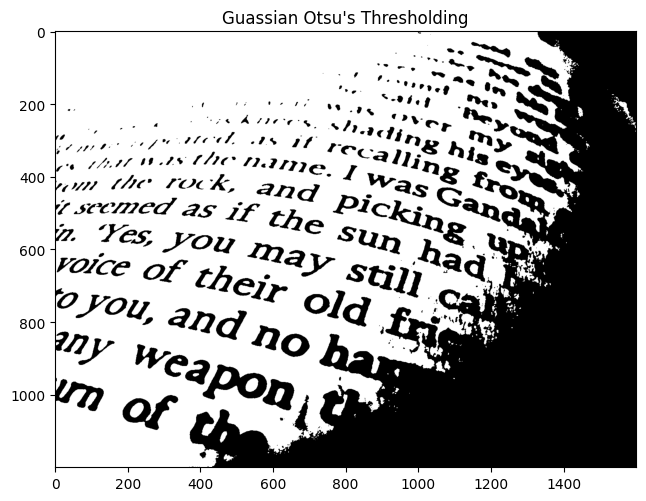

In [25]:

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Otsu's Thresholding", th2) 

# Guassian Otsu é basicamente aplicação do filtro pré-uso 
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Guassian Otsu's Thresholding", th3) 

### **SkImage Threshold Local**

Usando agora a Scikit-Image junto ao OPENCV


``threshold_local(image, block_size, offset=10)``

A função limiar_local calcula limites em regiões com um tamanho característico ``block_size`` ao redor de cada pixel (ou seja, vizinhanças locais). Cada valor limite é a média ponderada da vizinhança local menos um valor ``offset``


https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding.html

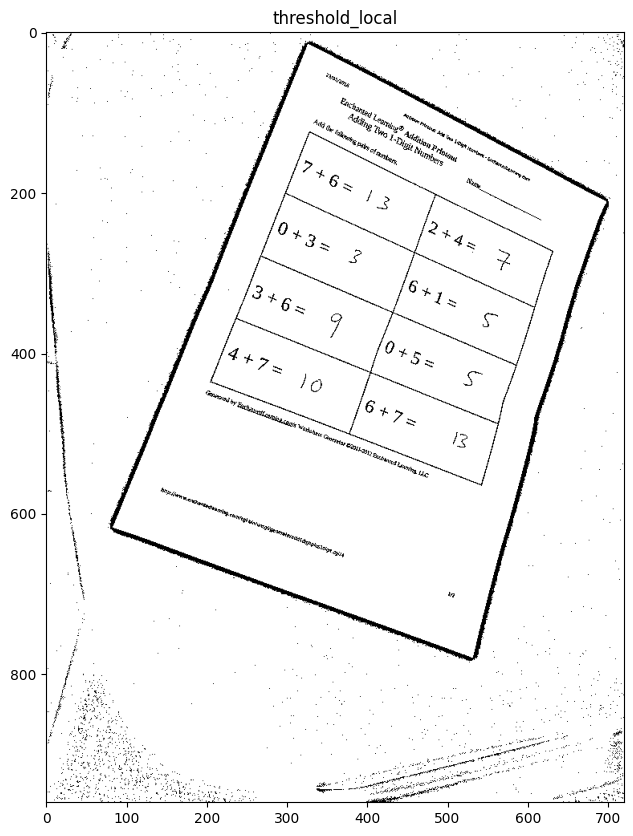

In [ ]:
from skimage.filters import threshold_local

image = cv2.imread('./images/scan.jpg')

# Obtemos o componente Value do espaço de cores HSV 
# então aplicamos limiarização adaptativa
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian") #Método padrão é baseado em Guassian

# Apply the threshold operation 
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh)

### **Por que Bluring é importante antes de aplicar Thresholding?** 

## **Resposta - Ruído**
